In [35]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

C:\Users\Terry_Xu\AppData\Local\Temp\ipykernel_22564\1659410565.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Data load

In [91]:
# df_ori = pd.read_csv('./data/adjclose_10.csv', sep=',')
# df_ori['cash'] = 1
df_ori = pd.read_csv('./data/adjclose_100.csv', sep=',')
#df_ori = pd.read_csv('./data/adjclose_200.csv', sep=',')
# df_ori = pd.read_csv('./data/adjclose_390.csv', sep=',')
df_ori.head()

,Date,AAPL,ABT,ACN,ADBE,ADI,ADP,AMAT,AMD,AMGN,...,TMO,TXN,UNH,UNP,UPS,VRTX,VZ,WFC,WMT,XOM
0,2003-12-01,0.328628,12.641927,18.253563,21.010983,31.728966,19.435575,17.851242,18.070000,42.911766,...,22.943556,19.876213,22.166023,10.874557,41.826843,9.36,11.135653,16.427286,36.405926,18.915049
1,2003-12-02,0.326054,12.717790,18.476860,20.571692,31.486849,19.485493,17.740637,17.900000,42.665436,...,22.695620,19.830112,22.275522,10.834273,41.456890,9.21,11.067695,16.262320,35.417294,18.972227
2,2003-12-03,0.318334,12.723415,18.714575,20.796329,31.091839,19.195936,17.504692,17.290001,42.629215,...,22.695620,19.428366,22.105175,10.871202,41.570724,8.88,10.955559,16.142838,35.196846,18.993017
3,2003-12-04,0.320151,12.743079,18.440844,20.791340,30.932539,19.400625,17.121265,16.660000,43.187080,...,22.514439,19.191277,21.975384,10.953459,41.878052,9.10,11.298765,16.191193,35.417294,19.242523
4,2003-12-05,0.315609,12.633499,18.246351,19.418562,30.046944,19.400625,16.472399,16.070000,42.237999,...,22.466757,18.677580,21.642797,10.985355,41.673180,9.21,11.349733,16.157064,35.724567,19.117754


In [92]:
df_ori.set_index('Date', inplace=True)
df_ori = df_ori.dropna(axis=1)
df_ori.index = pd.DatetimeIndex(df_ori.index)
# ENDTIME = pd.to_datetime('2008-12-31')
# df_ori = df_ori.loc[df_ori.index <= ENDTIME]
df_ori.tail()

,AAPL,ABT,ACN,ADBE,ADI,ADP,AMAT,AMD,AMGN,AMT,...,TMO,TXN,UNH,UNP,UPS,VRTX,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-22,191.309998,102.699997,333.130005,619.719971,182.669998,231.149994,149.479996,122.510002,264.589996,198.789993,...,487.529999,153.929993,543.760010,223.490005,150.750000,353.230011,37.349998,42.779999,154.669998,104.010002
2023-11-24,189.970001,102.870003,334.040009,619.429993,183.050003,230.660004,150.339996,122.309998,265.459991,199.320007,...,490.779999,153.589996,547.099976,224.279999,152.029999,353.040009,37.410000,42.919998,156.059998,104.570000
2023-11-27,189.789993,102.709999,332.429993,619.270020,183.770004,229.160004,150.809998,122.650002,264.269989,201.210007,...,490.130005,152.600006,543.590027,219.850006,149.589996,350.190002,37.349998,43.020000,156.770004,103.959999
2023-11-28,190.399994,102.059998,332.559998,623.320007,183.199997,228.990005,148.059998,122.010002,265.519989,203.220001,...,485.920013,152.899994,540.530029,221.229996,150.740005,347.040009,37.470001,43.369999,158.639999,103.900002
2023-11-29,189.369995,103.629997,333.339996,617.390015,182.710007,229.160004,149.360001,123.849998,266.600006,206.179993,...,492.920013,153.199997,534.979980,221.470001,152.289993,351.000000,37.759998,43.779999,156.080002,102.339996


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 615.23it/s]


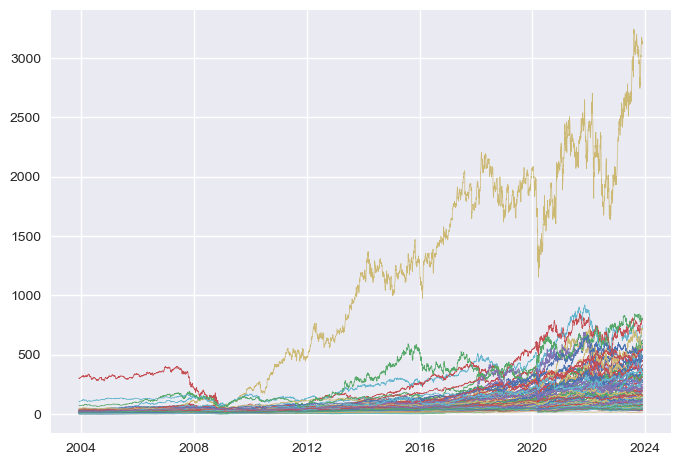

In [93]:
plt.figure()
for stk in tqdm(df_ori.columns):
    plt.plot(df_ori.index, df_ori.loc[:,stk], linewidth=0.5)#, label=stk)
    # plt.legend(loc='best')
# plt.plot(df_ori.index, df_ori.iloc[:,232], linewidth=0.5, label='MNST')
plt.show()

In [94]:

df = df_ori.pct_change().iloc[1:,:]
df['cash']=(1.1)**(1/252)-1
df.head()

,AAPL,ABT,ACN,ADBE,ADI,ADP,AMAT,AMD,AMGN,AMT,...,TXN,UNH,UNP,UPS,VRTX,VZ,WFC,WMT,XOM,cash
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-02,-0.007831,0.006001,0.012233,-0.020908,-0.007631,0.002568,-0.006196,-0.009408,-0.005740,-0.007860,...,-0.002319,0.004940,-0.003704,-0.008845,-0.016026,-0.006103,-0.010042,-0.027156,0.003023,0.000378
2003-12-03,-0.023676,0.000442,0.012866,0.010920,-0.012545,-0.014860,-0.013300,-0.034078,-0.000849,-0.014965,...,-0.020259,-0.007647,0.003409,0.002746,-0.035831,-0.010132,-0.007347,-0.006224,0.001096,0.000378
2003-12-04,0.005706,0.001545,-0.014627,-0.000240,-0.005124,0.010663,-0.021904,-0.036437,0.013086,-0.025022,...,-0.012203,-0.005872,0.007566,0.007393,0.024775,0.031327,0.002995,0.006263,0.013137,0.000378
2003-12-05,-0.014187,-0.008599,-0.010547,-0.066026,-0.028630,0.000000,-0.037898,-0.035414,-0.021976,0.001834,...,-0.026767,-0.015134,0.002912,-0.004892,0.012088,0.004511,-0.002108,0.008676,-0.006484,0.000378
2003-12-08,0.009594,0.007784,-0.011054,0.013625,-0.011875,-0.004375,0.004924,-0.020535,-0.006004,-0.006405,...,-0.004231,0.007496,0.003070,0.002595,0.003257,-0.011676,0.007218,-0.001496,0.016858,0.000378


In [95]:
df = df.dropna(axis=1)
df.isnull().sum().sum()

0

In [96]:
df.head()

,AAPL,ABT,ACN,ADBE,ADI,ADP,AMAT,AMD,AMGN,AMT,...,TXN,UNH,UNP,UPS,VRTX,VZ,WFC,WMT,XOM,cash
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-02,-0.007831,0.006001,0.012233,-0.020908,-0.007631,0.002568,-0.006196,-0.009408,-0.005740,-0.007860,...,-0.002319,0.004940,-0.003704,-0.008845,-0.016026,-0.006103,-0.010042,-0.027156,0.003023,0.000378
2003-12-03,-0.023676,0.000442,0.012866,0.010920,-0.012545,-0.014860,-0.013300,-0.034078,-0.000849,-0.014965,...,-0.020259,-0.007647,0.003409,0.002746,-0.035831,-0.010132,-0.007347,-0.006224,0.001096,0.000378
2003-12-04,0.005706,0.001545,-0.014627,-0.000240,-0.005124,0.010663,-0.021904,-0.036437,0.013086,-0.025022,...,-0.012203,-0.005872,0.007566,0.007393,0.024775,0.031327,0.002995,0.006263,0.013137,0.000378
2003-12-05,-0.014187,-0.008599,-0.010547,-0.066026,-0.028630,0.000000,-0.037898,-0.035414,-0.021976,0.001834,...,-0.026767,-0.015134,0.002912,-0.004892,0.012088,0.004511,-0.002108,0.008676,-0.006484,0.000378
2003-12-08,0.009594,0.007784,-0.011054,0.013625,-0.011875,-0.004375,0.004924,-0.020535,-0.006004,-0.006405,...,-0.004231,0.007496,0.003070,0.002595,0.003257,-0.011676,0.007218,-0.001496,0.016858,0.000378


### equally weighted

In [97]:
def equally_weighted(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1 / len(df.columns)] * len(df.columns))
    ret_EW=[]
    # print(cur_stg)

    for i in range(len(df)):
        cur_ret_EW=np.dot(cur_stg, 1 + df.iloc[i,:].values)
        cur_pfl = cur_pfl * cur_ret_EW
        arr_pfl.append(cur_pfl)
        ret_EW.append(cur_ret_EW)

    return arr_pfl,ret_EW

arr_equal, ret_EW= equally_weighted(df)

In [43]:
test_df=pd.DataFrame({'A':[2,0.5,2,0.5],"B":[0.5,2,0.5,2],"C":[1,2,3,4]})
test_df

,A,B,C
0,2.0,0.5,1
1,0.5,2.0,2
2,2.0,0.5,3
3,0.5,2.0,4


### BCRP

In [44]:
#Best constant rebalanced portfolio in hindsight
def BCRP(df):
    x=cp.Variable(len(df.columns),nonneg=True)
    objective=cp.Maximize(cp.sum(cp.log(1+df.values@x)))
    constrains=[cp.sum(x)<=1]
    problem=cp.Problem(objective,constrains)
    result=problem.solve(solver=cp.ECOS)
    weight=x.value
    arr_pfl = [1]
    cur_pfl = 1
    for i in range(len(df)):
        cur_pfl = cur_pfl * np.dot(weight, 1 + df.iloc[i,:].values)
        arr_pfl.append(cur_pfl)
    return weight,arr_pfl
weight_BCRP,arr_BCRP=BCRP(df)
weight_BCRP

array([0.66681822, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33318178, 0.        , 0.        , 0.        ,
       0.        ])

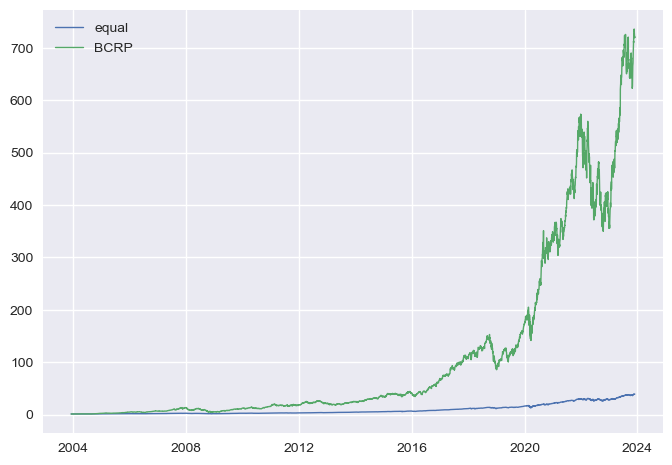

In [45]:

plt.figure()
# plt.plot(df.index, arr_pfl[:-1], linewidth=0.5, label='OGD')
plt.plot(df.index, arr_equal[:-1], linewidth=1, label='equal')
plt.plot(df.index,arr_BCRP[:-1], linewidth=1, label='BCRP')
plt.legend(loc='best')
plt.show()

### loss function

In [98]:
df_num=df.values

In [47]:
def minstrategy_regret(df_num):
    x=cp.Variable(df_num.shape[1],nonneg=True)
    objective=cp.Minimize(cp.sum(-1*cp.log(1+df_num)@x))
    constrains=[cp.sum(x)==1]
    prob=cp.Problem(objective,constrains)
    result=prob.solve(solver=cp.ECOS)
    return objective.value
xmin=minstrategy_regret(df_num[0:10])
xmin
    
    

-0.03801465076052447

In [48]:
def minstrategy_regret_x(df_num):
    x=cp.Variable(df_num.shape[1],nonneg=True)
    objective=cp.Minimize(cp.sum(-1*cp.log(1+df_num)@x))
    constrains=[cp.sum(x)==1]
    prob=cp.Problem(objective,constrains)
    result=prob.solve(solver=cp.ECOS)
    return x.value
#xmin=minstrategy_regret_x(df_num)

In [49]:
minstrategy_re=[]
for i in tqdm(range(df_num.shape[0])):
    x=minstrategy_regret(df_num[:i+1,:])
    minstrategy_re.append(x)
minstrategy_re
    

  0%|          | 12/5033 [00:00<00:44, 111.80it/s]

100%|██████████| 5033/5033 [00:53<00:00, 94.41it/s] 


[-0.004927785292494508,
 -0.0041137685179443925,
 -0.01716425491444971,
 -0.010660001692191019,
 -0.027376661922439753,
 -0.03377314146211194,
 -0.037750371711376046,
 -0.040920961684096493,
 -0.04486982506860248,
 -0.03801465076052447,
 -0.055584256620102274,
 -0.0661856744968326,
 -0.07972551330853106,
 -0.0845347215799494,
 -0.081246896965236,
 -0.08831584084497121,
 -0.09032644760371189,
 -0.09583463374571338,
 -0.10898124067933704,
 -0.11144222386242666,
 -0.11927782871461917,
 -0.11021253502373607,
 -0.13332544834074475,
 -0.14139628350244332,
 -0.1502285782204551,
 -0.15381890682987037,
 -0.16805403536080826,
 -0.17937583582005723,
 -0.12636458473799006,
 -0.1189689904627756,
 -0.12061787972036978,
 -0.13573511797946444,
 -0.16333118517337442,
 -0.12971130887830307,
 -0.12608414903134377,
 -0.12025325995405144,
 -0.13260391190424725,
 -0.12489970228848207,
 -0.11463295188574876,
 -0.13067617206440124,
 -0.11414297032221171,
 -0.11168835955095824,
 -0.10478337628655135,
 -0.10329

$$
\text{Regret}=\sum_{\tau=1}^{T}\langle g,x_{\tau}\rangle-\min_{x \in X}\sum_{\tau=1}^{T}\langle g,x\rangle
$$

$$
\text{loss}=-\ln(\text{1+return})\mathbf{x}
$$
$$
\text{gradient}=-\ln (\text{1+return})
$$

### OGD

In [50]:
# begin OGD process
# import math

def OGD_update(x_old, ETA, loss, num_of_var):
    x = cp.Variable(num_of_var, nonneg=True)
    # x = cp.Variable(num_of_var, nonneg=False)
    # objective = cp.Minimize(ETA * np.array(loss) @ x + 0.5 * cp.sum((x - x_old) ** 2))
    objective = cp.Minimize(cp.norm(x_old-ETA*loss-x,2))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve(solver='SCS')

    return x.value

def OGD_algo(df_num):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    # regret=0

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
       
       
        ETA=0.08

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (np.log(df_num[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, len(df.columns))
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_OGD , arr_stg_OGD , ret_OGD, weight_OGD,acu_regret_OGD,avg_regret_OGD= OGD_algo(df_num)

100%|██████████| 5033/5033 [00:49<00:00, 101.56it/s]


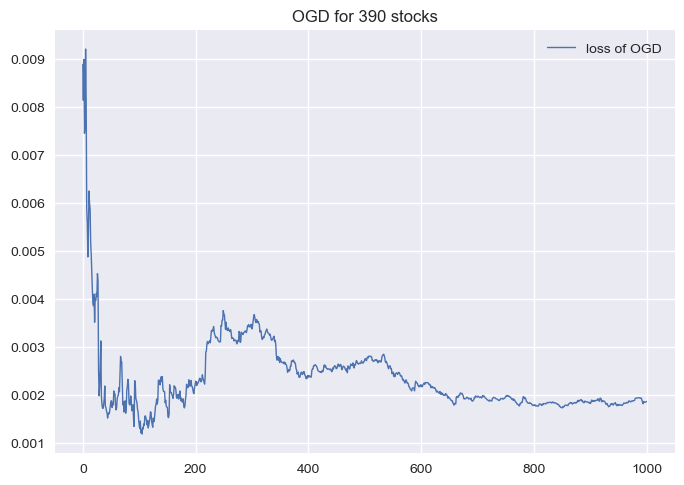

In [51]:
plt.figure()
plt.plot(avg_regret_OGD[:1000], linewidth=1, label='loss of OGD')
plt.legend(loc='best')
plt.savefig('./result/OGD_for_390 stocks.png',bbox_inches='tight') 
plt.title('OGD for 390 stocks')
plt.show()

### OMD

In [52]:
# begin OMD process
# import math

def OMD_update(x_old, loss, num_of_var, A):
    x = cp.Variable(num_of_var, nonneg=True)
    #x = cp.Variable(num_of_var)
    objective = cp.Minimize(loss @ x + 0.5 * (x.T@A@x)-(x.T@A@x_old))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()

    return x.value

def OMD_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(df_num[i,:]+1)
        # OMD to find strategy in the next round
        ETA=0.5
        a=ETA+cur_stg
        A=np.diag(a)
        last_stg = cur_stg.copy()
        regre=regre+(direction@cur_stg)
        #regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        cur_stg = OMD_update(cur_stg, direction, len(df.columns),A)
        arr_stg.append(cur_stg)
        

    return arr_pfl , arr_stg, ret, weight,avg_regret, acu_regret


arr_pfl_OMD , arr_stg_OMD , ret_OMD, weight_OMD,avg_regret_OMD,acu_regret_OMD= OMD_algo(df)

100%|██████████| 5033/5033 [01:04<00:00, 78.64it/s]


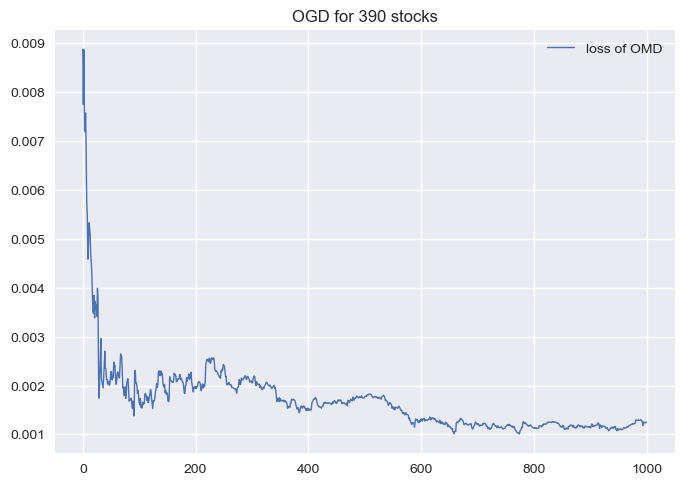

In [53]:
plt.figure()
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='loss of OMD')
plt.legend(loc='best')
plt.savefig('./result/OMD_for_390 stocks.png',bbox_inches='tight') 
plt.title('OGD for 390 stocks')
plt.show()

In [54]:
plt.figure()
plt.plot(avg_regret_OGD[:1000], linewidth=1, label='loss of OGD')
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='loss of OMD')
plt.legend(loc='best')
plt.savefig('./result/OGDandOMD_for_390 stocks.png',bbox_inches='tight') 
plt.title('average loss of OGD and OMD for 390 stocks')
plt.show()

NameError: name 'avg_regret' is not defined

<Figure size 800x550 with 0 Axes>

### up

In [55]:

# Donot use up, It need lots of time 
# df_num=df.values
# df_num=(1+df_num)
# df_num
# import itertools
# #universal portfolio(up)
# def binnings(n, k, cache={}):
#     if n == 0:
#         return np.zeros((1, k))
#     if k == 0:
#         return np.empty((0, 0))
#     args = (n, k)
#     if args in cache:
#         return cache[args]
#     a = binnings(n - 1, k, cache)
#     a1 = a + (np.arange(k) == 0)
#     b = binnings(n, k - 1, cache)
#     b1 = np.hstack((np.zeros((b.shape[0], 1)), b))
#     result = np.vstack((a1, b1))
#     cache[args] = result
#     return result

# def portfolio_wealth(b, stock_data):
#     return np.prod(np.dot(stock_data,b))

# def up_algo(df):
#     arr_pfl = [1]
#     cur_pfl = 1
#     cur_stg = np.array([1/len(df.columns)] * len(df.columns))
#     last_stg = np.array([1/len(df.columns)] * len(df.columns))
#     arr_stg = [cur_stg]
#     COMMISSION = 1e-3
#     ret=[1]
#     weight=[sum(cur_stg)]
#     allocation_granularity = 20
#     all_portfolio_allocations = binnings(allocation_granularity, len(df.columns))
#     row_sums = all_portfolio_allocations.sum(axis=1)
#     all_portfolios = all_portfolio_allocations / row_sums[:,np.newaxis]
#     for i in tqdm(range(len(df))):
#         commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
#         current_ret=np.dot(cur_stg, df_num[i,:])- commision_rate
#         cur_pfl = cur_pfl * (current_ret- commision_rate)
#         ret.append(current_ret)
#         weight.append(np.sum(cur_stg))
#         arr_pfl.append(cur_pfl)
#         last_stg = cur_stg.copy()
#         #update
#         portfolio_weights = np.array([portfolio_wealth(x, df_num[:i,:]) for x in list(all_portfolios)])
#         weighted_portfolio = np.dot(portfolio_weights, all_portfolios)
#         cur_stg = weighted_portfolio / np.sum(portfolio_weights)

#         arr_stg.append(cur_stg)
#     return arr_pfl , arr_stg, ret, weight

        
# arr_pfl_up , arr_stg_up , ret_up, weight_up= up_algo(df)     

### buy and hold

In [71]:
#buy and hold
def buy_and_hold(df_ori):
    arr_pfl = [1]
    ret=[1]
    stg = np.array([1/len(df_ori.columns)] * len(df_ori.columns))
    arr_stg=[stg]
    units=stg/df_ori.iloc[0,:].values
    for i in range(1,len(df_ori)):
        cur_pfl=df_ori.iloc[i,:].values@units
        cur_ret=cur_pfl/arr_pfl[-1]
        cur_stg=np.multiply(df_ori.iloc[i,:].values,units)/np.dot(df_ori.iloc[i,:].values,units)
        arr_pfl.append(cur_pfl)
        arr_stg.append(cur_stg)
        ret.append(cur_ret)
    return arr_pfl,arr_stg,ret[:-1]

arr_pfl_BH,arr_stg_BH,ret_BH=buy_and_hold(df_ori)

    


### EG algorithm

In [57]:
# EG algorithm
def EG_update(x_old,loss,ETA):
    x=np.multiply(x_old,np.exp(-1*loss*ETA)/np.dot(x_old,np.exp(-1*loss*ETA)))
    return x
                  
def EG_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[]
    weight=[sum(cur_stg)]
    ETA=10

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()
        
        cur_stg = EG_update(cur_stg, direction, ETA)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_EG , arr_stg_EG , ret_EG, weight_EG= EG_algo(df)  

100%|██████████| 5033/5033 [00:02<00:00, 2300.45it/s]


### RM algorithms

In [58]:
#RM algorithms
def RM_update(regret_old,x_old,loss):
    regret=(regret_old)+(np.dot(loss,x_old)-loss)
    x=np.maximum(regret,0)/np.sum(np.maximum(regret,0))
    return regret, x

def RM_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[]
    weight=[sum(cur_stg)]
    
    regret_old=0
    flag=1

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()
     
        regret_old,cur_stg = RM_update(regret_old,cur_stg ,direction)

        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_RM , arr_stg_RM , ret_RM, weight_RM= RM_algo(df)  


100%|██████████| 5033/5033 [00:02<00:00, 2404.60it/s]


In [59]:
#RM+ algorithms
def RMPLUS_update(regret_old,x_old,loss):
    regret=np.maximum(regret_old+(np.dot(loss,x_old)-loss),0)
    x=regret/np.sum(regret)
    return regret, x

def RMPLUS_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[]
    weight=[sum(cur_stg)]
    ETA=1.2
    regret_old=0

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()
        
        regret_old,cur_stg = RMPLUS_update(regret_old,cur_stg ,direction)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_RMPLUS, arr_stg_RMPLUS , ret_RMPLUS, weight_RMPLUS= RMPLUS_algo(df)  

  0%|          | 0/5033 [00:00<?, ?it/s]

100%|██████████| 5033/5033 [00:02<00:00, 2153.03it/s]


### market cap strategy

In [87]:
import yfinance as yf
def get_outstanding(df):    
    ticker=list(df.columns)
    outstanding=[]
    for i in tqdm(ticker[:-1]):
        stock=yf.Ticker(i)
        info=stock.info
        shares_outstanding = info.get('sharesOutstanding', 'No data')
        outstanding.append(shares_outstanding)
    return pd.DataFrame([outstanding],columns=ticker[:-1])
outstanding_df=get_outstanding(df)
outstanding=outstanding_df.values
market_cap=df_ori.values*outstanding
share=market_cap/np.sum(market_cap,axis=1)[:,np.newaxis]
arr_stg_MC=share
ret=np.sum(df_num[:,:-1]*share[:-1,:],axis=1)
ret_MC=ret+1
arr_pfl_MC=np.cumprod(1+ret)
arr_stg_MC.shape

    

100%|██████████| 10/10 [00:02<00:00,  4.88it/s]


(5034, 10)

In [99]:
import yfinance as yf
def get_outstanding(df):    
    ticker=list(df.columns)
    outstanding=[]
    for i in tqdm(ticker[:-1]):
        stock=yf.Ticker(i)
        info=stock.info
        shares_outstanding = info.get('sharesOutstanding', 'No data')
        outstanding.append(shares_outstanding)
    return pd.DataFrame([outstanding],columns=ticker[:-1])
outstanding_df=get_outstanding(df)
outstanding_df.to_csv('./data/outstanding_100.csv')

100%|██████████| 100/100 [00:15<00:00,  6.43it/s]


### Nested OGD

In [78]:
algo_name=['euqally_weight','OGD',"OMD",'buyandhold','EG','RM','RM+','market_cap']
algos_ret=(np.array([ret_EW,ret_OGD,ret_OMD,ret_BH,ret_EG,ret_RM,ret_RMPLUS,ret_MC]).T)-1


In [ ]:
algos_minstrategy_re=[]
for i in tqdm(range(algos_ret.shape[0])):
    x=minstrategy_regret(algos_ret[:i+1,:])
    algos_minstrategy_re.append(x)
algos_minstrategy_re

In [81]:
def NestedOGD_algo(algos_ret):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    last_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    # regret=0

    for i in tqdm(range(len(algos_ret))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + algos_ret[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
        
        
        ETA=0.5

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (np.log(algos_ret[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(algos_ret[:i+1,:])
        regret=regre-algos_minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, algos_ret.shape[1])
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_NOGD , arr_stg_NOGD , ret_NOGD, weight_NOGD,acu_regret_NOGD,avg_regret_NOGD= NestedOGD_algo(algos_ret)
    

  0%|          | 0/5033 [00:00<?, ?it/s]

100%|██████████| 5033/5033 [01:40<00:00, 50.32it/s]


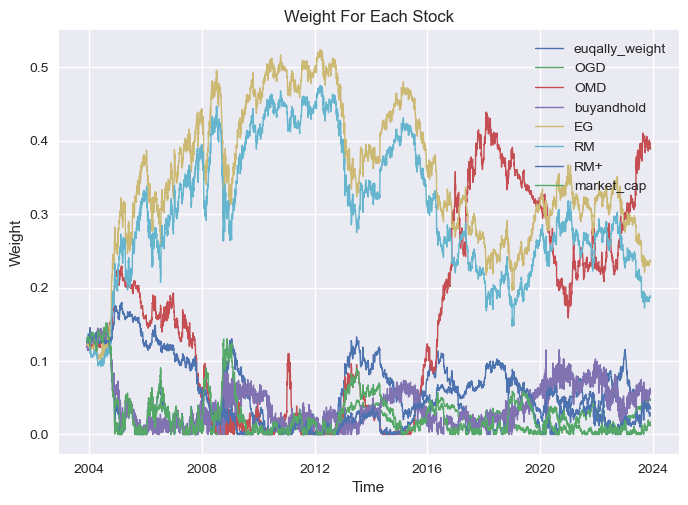

In [84]:
arr_stg = pd.DataFrame( arr_stg_NOGD[1:], columns=algo_name)

plt.figure()
for stk in arr_stg.columns:
    plt.plot(df.index,arr_stg.loc[:,stk], linewidth=1,label=stk)
    #plt.legend(loc='best')

#plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For Each Stock')
plt.show()

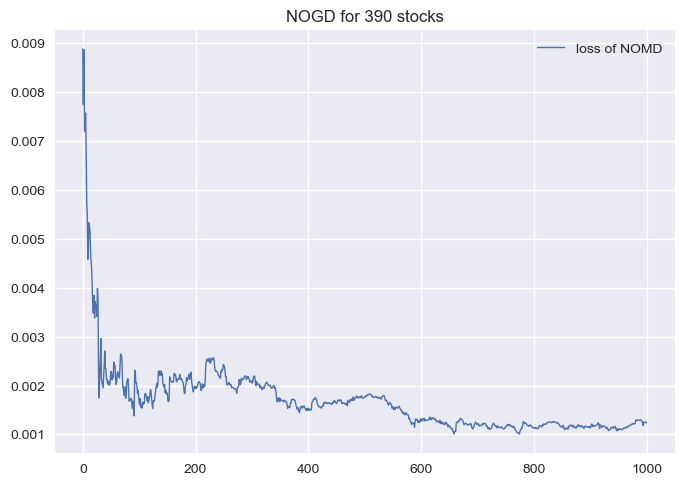

In [86]:
plt.figure()
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='loss of NOMD')
plt.legend(loc='best')
#plt.savefig('./result/OMD_for_390 stocks.png',bbox_inches='tight') 
plt.title('NOGD for 390 stocks')
plt.show()

### Graph

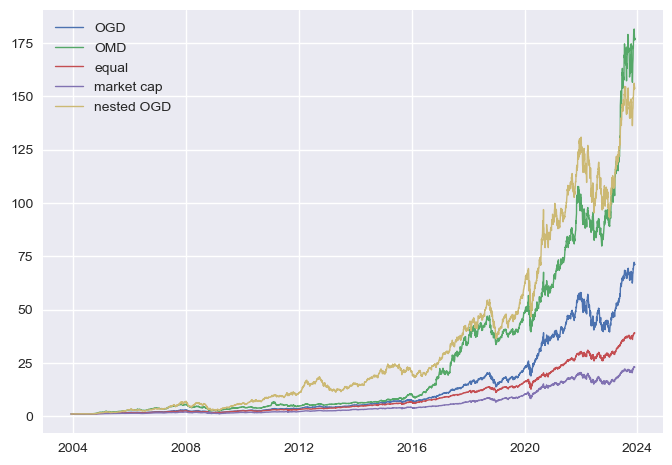

In [83]:
plt.figure()
plt.plot(df.index, arr_pfl_OGD[:-1], linewidth=1, label='OGD')
plt.plot(df.index, arr_pfl_OMD[:-1], linewidth=1, label='OMD')
# # plt.plot(df.index, arr_BCRP[1:], linewidth=1, label='BCRP')
plt.plot(df.index,arr_equal[:-1], linewidth=1, label='equal')
# # #plt.plot(df.index, arr_pfl_up, linewidth=1, label='up')
# plt.plot(df.index, arr_pfl_BH, linewidth=1, label='buy and hold')
# plt.plot(df.index, arr_pfl_EG[:-1], linewidth=1, label='EG')
# plt.plot(df.index,arr_pfl_RM[:-1], linewidth=1, label='RM')
# plt.plot(df.index,arr_pfl_RMPLUS[:-1], linewidth=1, label='RM+')
plt.plot(df.index,arr_pfl_MC, linewidth=1, label='market cap')
plt.plot(df.index,arr_pfl_NOGD[:-1], linewidth=1, label='nested OGD')
plt.legend(loc='best')
plt.savefig('./result/my_figure.png',bbox_inches='tight') 
plt.show()

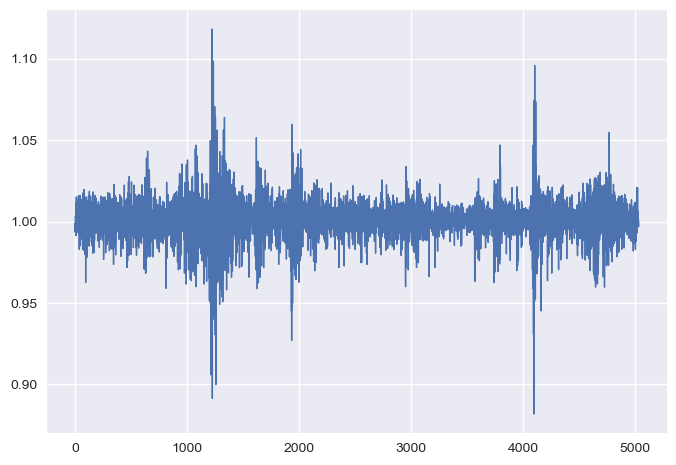

In [ ]:
plt.figure()
plt.plot(ret_RM[1:], linewidth=1, label='OGD')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


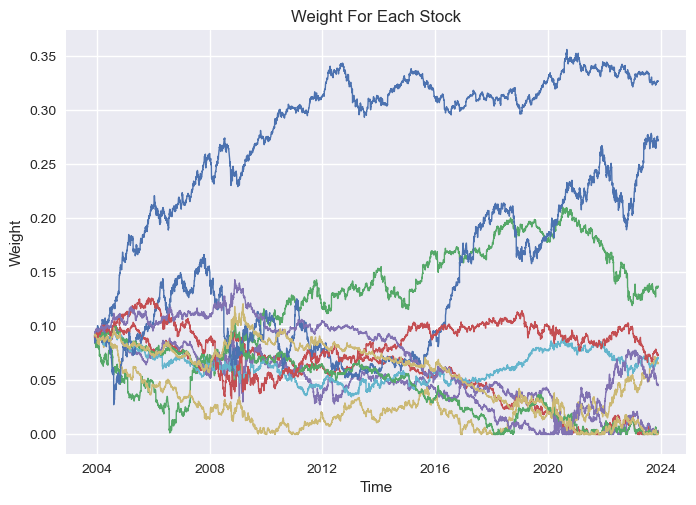

In [ ]:
arr_stg = pd.DataFrame( arr_stg_OGD[1:], columns=df.columns)

plt.figure()
for stk in arr_stg.columns:
    plt.plot(df.index,arr_stg.loc[:,stk], linewidth=1)
    #plt.legend(loc='best')

#plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For Each Stock')
plt.show()

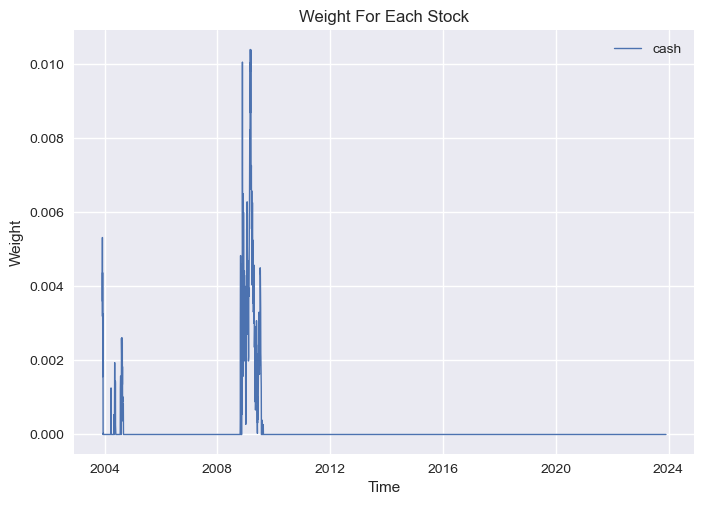

In [ ]:
plt.figure()
plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For Each Stock')
plt.show()

### Evaluate